In [58]:
import pandas as pd
import seaborn as sns
from lifelines import ExponentialFitter
import matplotlib.pyplot as plt
import numpy as np

In [59]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
data = pd.read_csv("Stroke_dum.csv", encoding="utf-8")

In [61]:
data=data.loc[data['age']>=32]
data

,id,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,0,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,51676,61.0,202.21,NaN,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
2,31112,80.0,105.92,32.5,0,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,1
3,60182,49.0,171.23,34.4,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,1
4,1665,79.0,174.12,24.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
5106,44873,81.0,125.20,40.0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5107,19723,35.0,82.99,30.6,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5108,37544,51.0,166.29,25.6,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


### Verificas si se cumplen los supuesto
- Assumption 1 - Appropriate outcome type (Must be categorical) 
    - There are only two outcomes (i.e. binary classification of the patient had or did not have a stroke)
- Assumption 2 - Linearity of independent variables and log odds
- Assumption 3 - No strongly influential outliers
- Assumption 4 - Absence of multicollinearity
- Assumption 5 - Independence of observations
- Assumption 6 - Sufficiently large sample size

In [62]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


predictors=['age', 'avg_glucose_level', 'hypertension_1', 'heart_disease_1', 'gender_Female', 'smoking_status_smokes','work_type_Private']
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(data[predictors], data['stroke_1'])

data_over_X = pd.DataFrame(data=X_over, columns=predictors)
data_over_y = pd.DataFrame(data=y_over, columns=['stroke_1'])
data_over_X
data_over_y

data_over_y.value_counts()

,age,avg_glucose_level,hypertension_1,heart_disease_1,gender_Female,smoking_status_smokes,work_type_Private
0,67.0,228.69,0,1,0,0,1
1,61.0,202.21,0,0,1,0,0
2,80.0,105.92,0,1,0,0,1
3,49.0,171.23,0,0,1,1,1
4,79.0,174.12,1,0,1,0,0
...,...,...,...,...,...,...,...
6423,64.0,191.61,0,1,0,1,1
6424,81.0,184.40,0,0,1,0,1
6425,55.0,210.40,1,1,1,1,1
6426,68.0,233.94,0,0,0,0,1


,stroke_1
0,1
1,1
2,1
3,1
4,1
...,...
6423,1
6424,1
6425,1
6426,1


stroke_1
0           3214
1           3214
Name: count, dtype: int64

__Assumption 4 : Absence of Multicollinearity__

(<Figure size 900x500 with 1 Axes>, <Axes: >)

<Axes: >

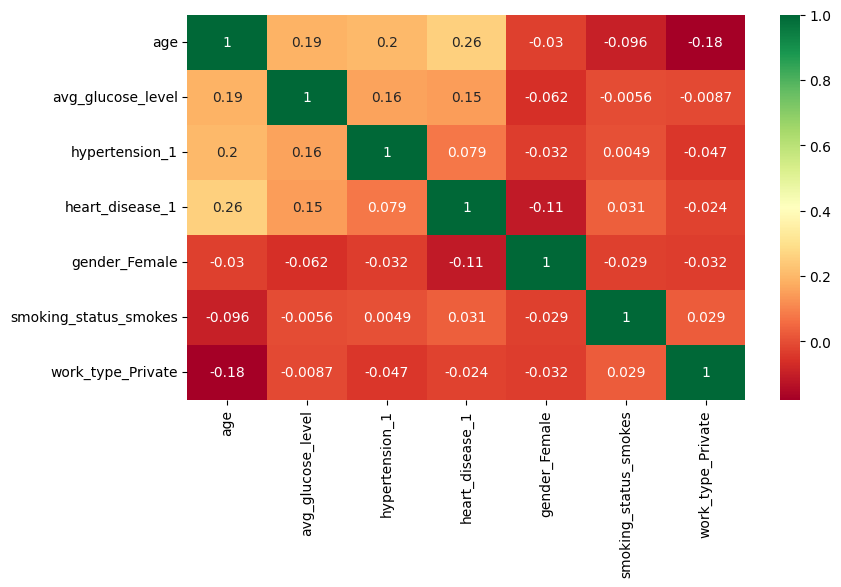

In [86]:
corrMatrix = data[predictors].corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

interval columns not set, guessing: ['age', 'avg_glucose_level', 'hypertension_1', 'heart_disease_1', 'gender_Female', 'smoking_status_smokes', 'work_type_Private']


(<Figure size 900x500 with 1 Axes>, <Axes: >)

<Axes: >

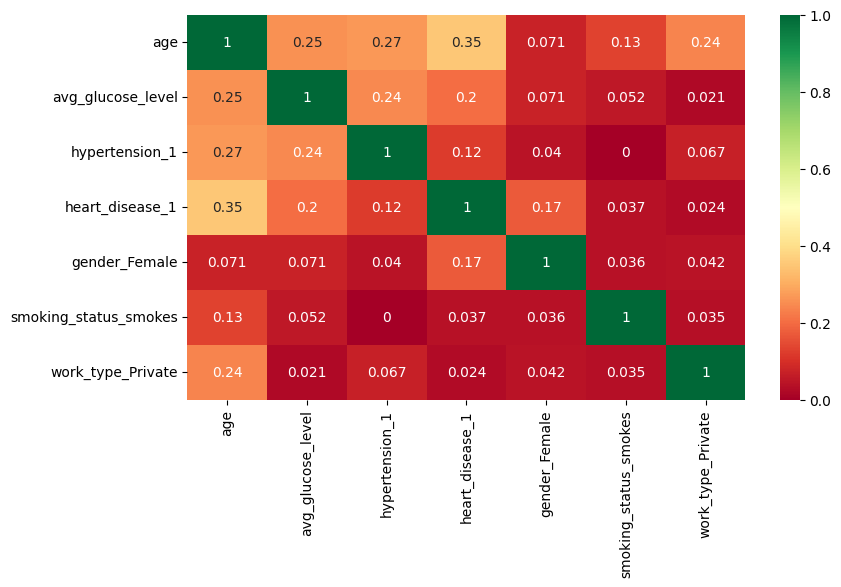

In [87]:
import phik
from phik import resources, report
corrMatrix = data[predictors].phik_matrix()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_over_X, data_over_y, test_size=0.3)
X_train
y_train

,age,avg_glucose_level,hypertension_1,heart_disease_1,gender_Female,smoking_status_smokes,work_type_Private
1939,57.0,59.85,0,0,1,0,1
2065,62.0,72.50,0,0,0,0,1
6159,67.0,61.94,1,0,1,1,0
398,81.0,69.01,0,0,1,0,1
1945,43.0,91.13,0,0,0,0,1
...,...,...,...,...,...,...,...
5012,80.0,110.66,0,0,1,0,0
5469,49.0,171.23,0,0,1,1,1
4321,82.0,200.59,0,0,0,0,0
4706,79.0,226.98,0,1,1,0,1


,stroke_1
1939,0
2065,0
6159,1
398,0
1945,0
...,...
5012,1
5469,1
4321,1
4706,1


In [64]:
X_train_age=X_train['age']
X_train_age
y_train=y_train['stroke_1']

1939    57.0
2065    62.0
6159    67.0
398     81.0
1945    43.0
        ... 
5012    80.0
5469    49.0
4321    82.0
4706    79.0
5808    68.0
Name: age, Length: 4499, dtype: float64

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
X_train_age=np.array(X_train_age).reshape(-1,1)
y_train=np.array(y_train)
X_train_age
y_train

array([[57.],
       [62.],
       [67.],
       ...,
       [82.],
       [79.],
       [68.]])

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=20).fit(X_train_age, y_train)

In [69]:
model.intercept_

array([-4.54948574])

In [70]:
model.coef_

array([[0.07336693]])

In [71]:
model.predict_proba(X_train_age)

array([[0.59087191, 0.40912809],
       [0.50018409, 0.49981591],
       [0.40948415, 0.59051585],
       ...,
       [0.18745962, 0.81254038],
       [0.22330635, 0.77669365],
       [0.39186841, 0.60813159]])

In [72]:
model.score(X_train_age, y_train)

0.6928206268059569

In [73]:
confusion_matrix(X_train_age, model.predict(X_train_age))

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 60,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 213,   0, ...,   0,   0,   0],
       [  0, 170,   0, ...,   0,   0,   0],
       [  0, 110,   0, ...,   0,   0,   0]], dtype=int64)

In [74]:
print(classification_report(y_train, model.predict(X_train_age)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2254
           1       0.69      0.69      0.69      2245

    accuracy                           0.69      4499
   macro avg       0.69      0.69      0.69      4499
weighted avg       0.69      0.69      0.69      4499



In [75]:
import statsmodels.api as sm
model2 = sm.Logit(y_train, X_train_age)

In [76]:
X_res_train_3 = sm.add_constant(X_train_age)
model3 = sm.Logit(y_train, X_res_train_3)
result3 = model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.581006
         Iterations 5
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.162      
Date:               2023-11-24 17:40 AIC:              5231.8943  
No. Observations:   4499             BIC:              5244.7175  
Df Model:           1                Log-Likelihood:   -2613.9    
Df Residuals:       4497             LL-Null:          -3118.5    
Converged:          1.0000           LLR p-value:      1.9604e-221
No. Iterations:     5.0000           Scale:            1.0000     
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const     -4.5621     0.1658   -27.5148   0.0000   -4.8871   -4.2371
x1         0.0736     0.0026    28.2952   0.0

In [77]:
result = model2.fit()

Optimization terminated successfully.
         Current function value: 0.687884
         Iterations 3


In [78]:
result.pred_table()

array([[   0., 2254.],
       [   0., 2245.]])

In [79]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.008    
Date:               2023-11-24 17:40 AIC:              6191.5767
No. Observations:   4499             BIC:              6197.9883
Df Model:           0                Log-Likelihood:   -3094.8  
Df Residuals:       4498             LL-Null:          -3118.5  
Converged:          1.0000           LLR p-value:      nan      
No. Iterations:     3.0000           Scale:            1.0000   
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       0.0033      0.0005    6.8604    0.0000    0.0023    0.0042



Regesion logistica con tres variables

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(data_over_X, data_over_y)

c:\Users\samab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7134411947728687

array([[649, 311],
       [261, 708]], dtype=int64)

<Axes: >

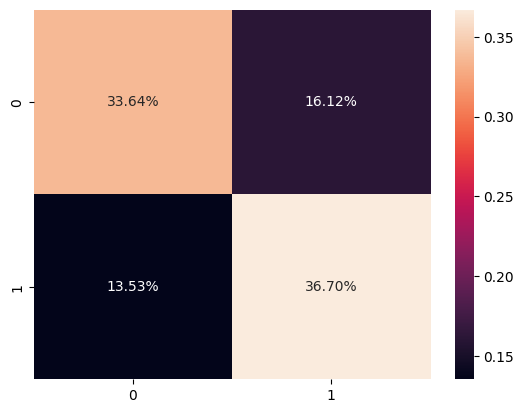

In [81]:
import numpy as np
cm = confusion_matrix(y_test, y_pred);
cm
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

In [82]:
from sklearn.metrics import accuracy_score as acc


In [83]:
acc(y_test, y_pred)

0.7034733022291343

In [84]:
X_train_4 = sm.add_constant(X_train)
model4 = sm.Logit(y_train, X_train_4)
result4 = model4.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.564018
         Iterations 6
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   y                 Pseudo R-squared:  0.186      
Date:                 2023-11-24 17:40  AIC:               5091.0322  
No. Observations:     4499              BIC:               5142.3250  
Df Model:             7                 Log-Likelihood:    -2537.5    
Df Residuals:         4491              LL-Null:           -3118.5    
Converged:            1.0000            LLR p-value:       1.2298e-246
No. Iterations:       6.0000            Scale:             1.0000     
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -5.1230   0.2060 -24.8710 0.0000 -5.5267 -4.7193
age